In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading the data set into pthon environment
from google.colab import files
uploaded = files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [3]:
#Reading the dataset using pandas library
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
#General info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
#Converting  date column to date time
df['date'] = pd.to_datetime(df['date'],format ='%d-%m-%Y %H:%M')

#Setting data as index
df.set_index('date', inplace=True)

#sorting the date column
df.sort_index(inplace=True)

In [6]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


### **Overview of the Dataset**

**=> <u>Structure</u>**

The data set contains 7588 entries/readings about exchange rate of dollar (currency) from USD(American) to AUD(Australian) with two columns.The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

**=> <u>Contents</u>**

- **date**: Exact date of the year that is relavent to analyze exchange rate of the data.
- **Ex_rate**: Exchange rate of Australian dollar from American dollar on the exact date.

### **Exploratory Data Analysis**

In [7]:
df.describe(include='all') #Statistical summary

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


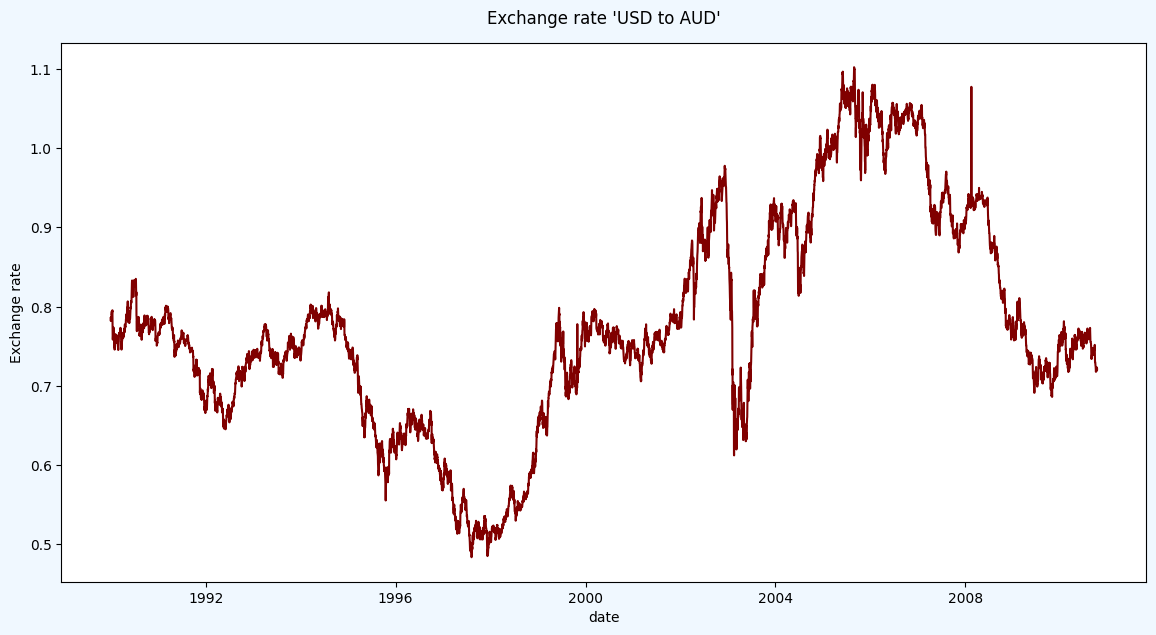

In [8]:
#Understanding trends and seasonality by visualizing the plot of time series
plt.figure(figsize= (14,7),facecolor= 'aliceblue')
plt.plot(df,color = 'maroon')
plt.title("Exchange rate 'USD to AUD'",y=1.02)
plt.xlabel('date')
plt.ylabel('Exchange rate')
plt.show()

### **Findings and Insights**

=> **<u>From Statistics</u>**

> **Data Distribution & it's Spread**

- It is reasonably large dataset as of 7588 observation/entries.
- The average of exchange rate(0.7769) suggests that most values are around this value.
- A mild spread around the mean of the data which indicates some fluctuations but not extreme.
- Slightly right skewed as median is less than mean of the data suggest that more values are concentrated on the lower exchange rate side.

> **Range & Inter Quartile Range**

- Lowest exchange rate that recorded is 0.4833 and highest is 1.1025 considering as of today rate 1.59 which is reasonable.
- Q3(75%) being 0.8735 with Q1(25%) is 0.7014 suggests that most values are between Q3 and Q1.

**=> <u>From Data Visualization</u>**

> **Trends**

- The exchange rate exhibits long-term cycles of appreciation and depreciation.and two short term cycles depreciation

- There are three major periods in this plot:

  - Period One(1990-1998): There is long going general decline in exchange rates indicating the AUD strengthening against the USD throughout this decade.

  - Period Two(1998-2003): A Quick recovery from USD at the end of 1998 with some fluctuations.
   - In 2003 a sudden drop in exchage rate
  - Period Three(2004-2009): A sharp increase, peaking around 2006, followed by a decline in 2009.
   - A slight depreciation a oft the end 2010.

> **Seasonality & Fluctuations**
 - The exchange rate shows recurring up-and-down cycles, indicating possible seasonality or external economic influences like political realignments and others.

 - A Short-term fluctuation increases after 1998 suggesting some external shocks or economic policy exchanges were involved.

> **Spikes and Sharp Drops**
 - Between 1998 and 2004, we see steep drops and sudden recoveries, which could be due to economic crises, policy shifts, or external market shocks.

 - The most instable period appears between 2003-2004, where extreme fluctuations occurred.

> **Possible Structural Breaks**
These trends indicating  some potential structural breaks like economic or financial regime shifts in respective countries.


### **Data Preprocessing**

In [9]:
#Ensure there are no missing values
df.isnull().sum()

,0
Ex_rate,0


In [10]:
#Checking if the data is stationary
from statsmodels.tsa.stattools import adfuller

def stationary_status(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print("Data is stationary.")
    else:
        print("Data is not stationary. Data needs to be differenced.")

stationary_status(df['Ex_rate'])

ADF Statistics: -1.664994
p-value: 0.449233
Data is not stationary. Data needs to be differenced.


In [11]:
#Differencing the data
df = df['Ex_rate'].diff().dropna()

stationary_status(df)

ADF Statistics: -99.393431
p-value: 0.000000
Data is stationary.


### **ARIMA Model Building**

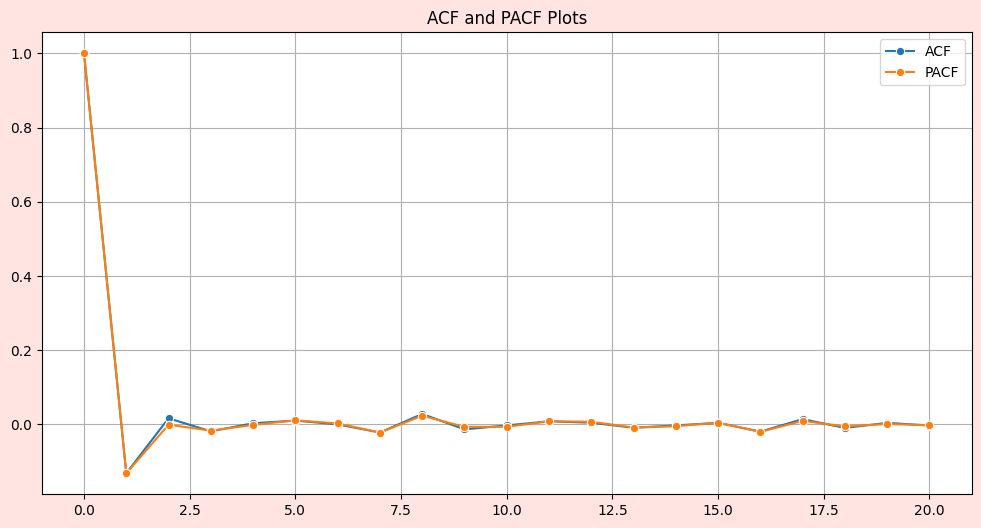

In [12]:
#Using ACF and PACF plots to estimate initial parameters(p,d,q) for ARIMA model
from statsmodels.tsa.stattools import acf, pacf

plt.figure(figsize = (12,6),facecolor = 'mistyrose')
sns.lineplot(acf(df,nlags= 20),marker = 'o',label = 'ACF')
sns.lineplot(pacf(df,nlags= 20),marker = 'o',label = 'PACF')
plt.title('ACF and PACF Plots')
plt.grid()
plt.legend()
plt.show()

In [13]:
#ARIMA model building using intial parameters
from statsmodels.tsa.arima.model import ARIMA

#Ensuring df index with frequency informatiom
df.index = pd.DatetimeIndex(df.index.values, freq='D')

amodel = ARIMA(df,order = (1,1,0),freq='D')
am_fit = amodel.fit()

#Summary of the model
am_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(1, 1, 0)   Log Likelihood               26347.837
Date:                Sat, 29 Mar 2025   AIC                         -52691.674
Time:                        05:38:59   BIC                         -52677.806
Sample:                    01-02-1990   HQIC                        -52686.915
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5654      0.002   -277.565      0.000      -0.569      -0.561
sigma2      5.633e-05    1.6e-07    351.163      0.000     5.6e-05    5.66e-05
===================================================================================
Ljung-Box (L1) (Q):                 298.83   Jarque-Bera (JB):           4911882.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.25   Skew:                            -1.94
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

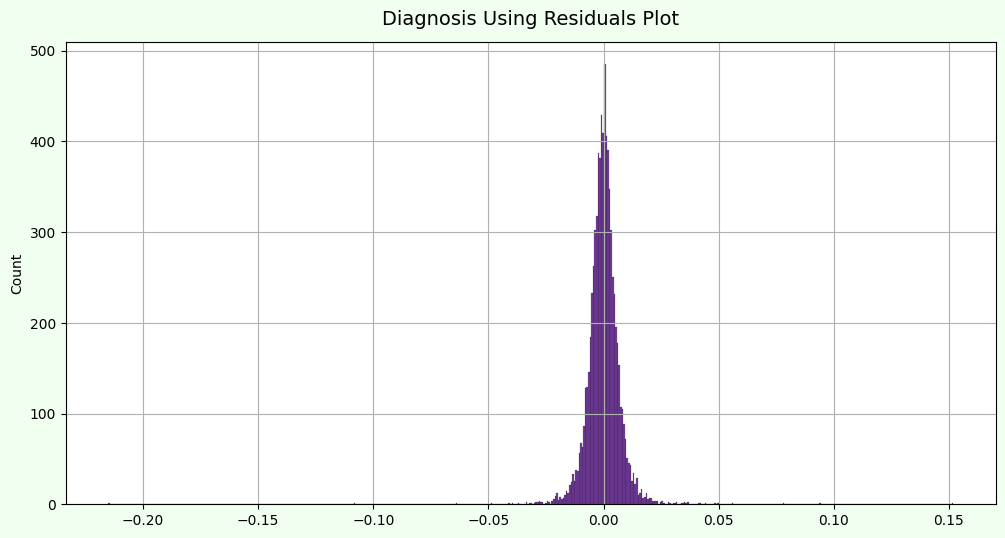

In [14]:
#Analyzing the residuals to ensure there are no patterns that might indicate inadequacies
am_residuals = am_fit.resid

plt.figure(figsize = (12,6),facecolor = 'honeydew')
sns.histplot(am_residuals,color='indigo')
plt.title('Diagnosis Using Residuals Plot',fontsize = 14,y=1.02)
plt.grid()
plt.show()

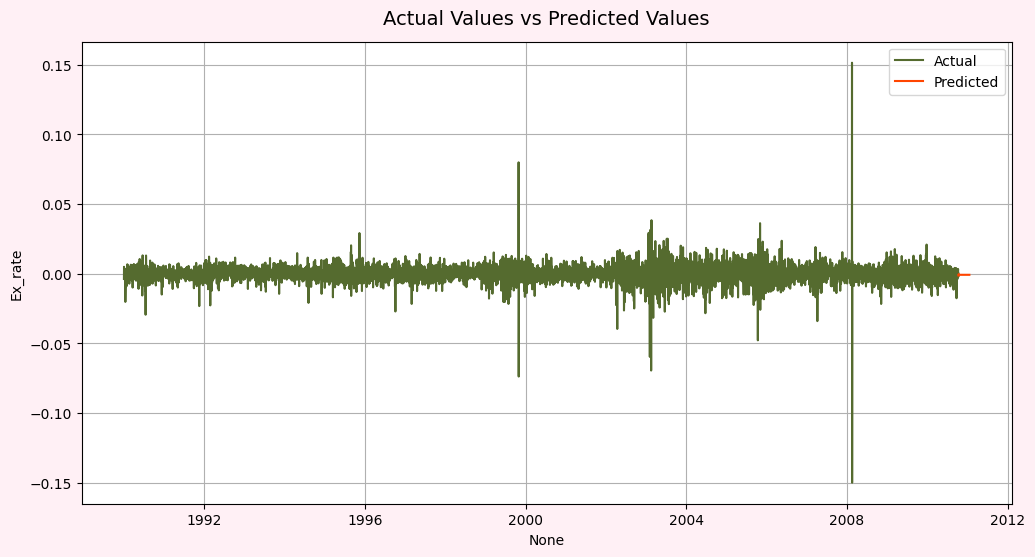

In [15]:
#Forecasting and Visualizing the predicted values against actual values
forecast_index = pd.date_range(start=df.index[-1], periods=101, freq='D')[1:]
am_forecast = am_fit.forecast(steps=100)
am_forecast = pd.Series(am_forecast, index=forecast_index)


plt.figure(figsize = (12,6),facecolor = 'lavenderblush')
sns.lineplot(x=df.index,y=df,color = 'darkolivegreen',label = 'Actual')
sns.lineplot(x=forecast_index,y=am_forecast,color = 'orangered',label = 'Predicted')
plt.title('Actual Values vs Predicted Values',fontsize = 14,y=1.02)
plt.legend()
plt.grid()
plt.show()

### **Insights**

- ARIMA model has constants fluctuations with some sharp spikes.
- These sudden spikes are making model struggle to capture suddeen shocks or crisis incidents.
- There are no pattern to identify seasonal trends.
- Some major spike in from 2000 to 2008 (anomalies) could be linked to the respective country Economic and political statusin that time.

### **Model Building - Exponential Smoothing**

In [16]:
#Since the data is stationary and has no seasonality and trends
#Let's build Simple Exponential Smoothing model.
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#Defining possible alpha values for smoothing level
alpha_values = np.linspace(0.01,1,20)
best_aic = float('inf')
best_alpha = None
best_model = None

#Ensuring df indel with freq information
df.index = pd.DatetimeIndex(df.index.values, freq='D')

#Grid search for best alpha
for alpha in alpha_values:
    ses_model = SimpleExpSmoothing(df,initialization_method='known', initial_level=alpha)

    #Fitting SimpleExpSmoothing model
    ses_fit = ses_model.fit(smoothing_level = alpha,optimized = False)

    aic = ses_fit.aic
    if aic < best_aic:
        best_aic = aic
        best_alpha = alpha
        best_model = ses_model



#Summary of the model
ses_fit.summary()

Dep. Variable:,Ex_rate,No. Observations:,7587
Model:,SimpleExpSmoothing,SSE,1.636
Optimized:,False,AIC,-64047.118
Trend:,None,BIC,-64033.250
Seasonal:,None,AICC,-64047.113
Seasonal Periods:,None,Date:,"Sat, 29 Mar 2025"
Box-Cox:,False,Time:,05:39:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,1.0000000,l.0,False


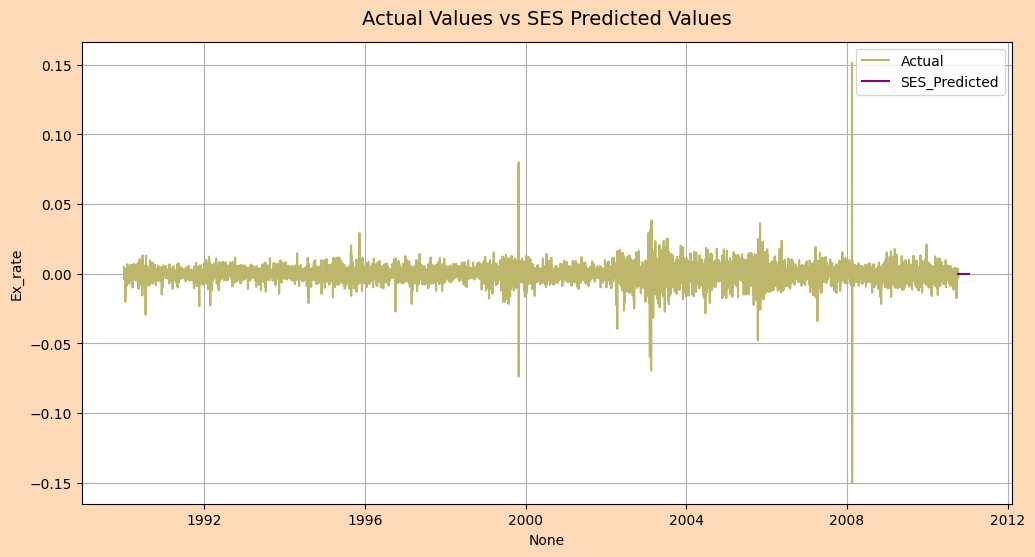

In [17]:
#Forecasting SES model with actual values
ses_forecast = ses_fit.forecast(steps=100)
ses_forecast = pd.Series(ses_forecast, index=forecast_index)

#Visualizing the plot
plt.figure(figsize = (12,6),facecolor = 'peachpuff')
sns.lineplot(x=df.index,y=df,color = 'darkkhaki',label = 'Actual')
sns.lineplot(x=forecast_index,y=ses_forecast,color = 'purple',label = 'SES_Predicted')
plt.title('Actual Values vs SES Predicted Values',fontsize = 14,y=1.02)
plt.legend()
plt.grid()
plt.show()

### **Insights**

- SES model considers mean,root mean squares and recent values so it casually ignores the spikes which are trends and seasonality.
- High fluctuation give hard time to predict values
- Best to predict short term forecasting while long term forecasting sure to fail.
- It is best if data is stationary means minimal to no trends and no seasonality.

### **Evaluation and Comparison**


In [18]:
#Evaluating of forecasts from both models
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error

#Getting actual values for forecasted period
actual_forecast = df[-100:]
#Adjusting forecast_index to align with available data in df
forecast_index = pd.date_range(start=df.index[-100], periods=100, freq='D')
ses_forecast_actual = df.loc[df.index.intersection(forecast_index)]

#Computing error metrices to evaluate the model
am_mse = mean_squared_error(actual_forecast,am_forecast)
am_rmse = root_mean_squared_error(actual_forecast,am_forecast)
am_mape = mean_absolute_percentage_error(actual_forecast,am_forecast)

ses_mse = mean_squared_error(ses_forecast_actual,ses_forecast)
ses_rmse = root_mean_squared_error(ses_forecast_actual,ses_forecast)
ses_mape = mean_absolute_percentage_error(ses_forecast_actual,ses_forecast)

#Comparing Both Models
print('Comparison of Both Models')
print(f'ARIMA MSE: {am_mse:.2f}','VS',f'SES MSE: {ses_mse:.2f}')
print(f'ARIMA RMSE: {am_rmse:.2f}','VS',f'SES RMSE:{ses_rmse}')
print(f'ARIMA MAPE: {am_mape:.2f}','VS',f'SES MAPE: {ses_mape:.2f}')

Comparison of Both Models
ARIMA MSE: 0.00 VS SES MSE: 0.00
ARIMA RMSE: 0.00 VS SES RMSE:0.003563344949622477
ARIMA MAPE: 277071013641.19 VS SES MAPE: 0.93


### **Model Performances Comparison: ARIMA vs. SES**

- Both models(ARIMA & SES) have very low error in terms of MSE(mean square error)
- While in terms of  RMSE (root mean square error) ARIMA model performs slightly better than SES model, but SES model is still performs fairly well.
- Model ARIMA shows a extreme high MAPE(mean absolute percentage error) value
 = 277071013641.19, which indicates extreme instability and unrealistic or an issue in calculations.while MAPE of SES model is 0.93, which is much more reasonable than ARIMA model high value.
- After observing the evaluation error metrics the ARIMA model seems to be overfitting(maybe because of parameters) while SES model is stable and easy to interpret predictions.

=> **<u>Adantages</u>**

> **ARIMA**

- It captures trends and seasonality well in fact better than SES model since it doesn't have the capability to capture.
- ARIMA model can handle complex dependencies.
- Better in providing lower MSE & RMSE values

> **SimpleExponentialSmoothing**

- Simple and fast in performing
- Works well for stationary data which is exactly what we did in the asssignment.
- SES model provides stable forecasts than ARIMA model

=> **<u>Limitations</u>**

> **ARIMA**

- Computationally expensive
- Model requires parameter tuning
- It's MAPE shows instability and poor performance

> **SimpleExponentialSmoothing**

- SES model fails to Ccapture trend or seasonality in forecast
- Also assumes constant mean & variances.



### **Conclusion**

=> **<u>Findings</u>**

> **ARIMA**

- The ARIMA model clearly shows some instability as evidenced by its high MAPE value, and struggled to capture sudden shocks or crisis incidents reflected in the forecasted data's spikes.

> **SimpleExponentialSmoothing**

- The SES model produced more stable forecasts than ARIMA and had significantly lower error in terms of MAPE.And it effectively ignored spikes which represent trends and seasonality as it relies on mean, root mean squares, and recent values for prediction.

=> **<u>Insights</u>**

> **Model Performance:**

- The SES model might provide more realistic forecasts for short-term predictions, especially in scenarios with stationary data devoid of significant trends and seasonality.
- While ARIMA demonstrated with lower MSE and RMSE values compared to SES,its high MAPE value raises serious concerns about its predictive stability.

> **Model Suitability for Exchange Rate Forecasting:**

- ARIMA model with its capability to capture trends and seasonality can be more suitable for long-term exchange rate forecasting when these factors play a significant role.
- However, ARIMA's instability and need for careful parameter tuning require attention and potentially limit its applicability in situations with volatile exchange rate fluctuations like political realignments ,financial crisis and policy changes.
- SES model being simple, fast, and providing stable forecasts, might be a more practical choice for short-term forecasts or when the data exhibits minimal to no trends and seasonality.
- However, its inability to capture the factors like trends and seasonality is a notable limitation for long-term exchange rate predictions.

>  **Overall Conclusion:**

- The SES model emerged as a more reliable choice than ARIMA for exchange rate forecasting in this specific dataset due to its lower MAPE and the stability of its predictions.
- While ARIMA's capacity to handle trends and seasonality holds potential advantages, its instability and high MAPE value raise concerns regarding its practical application for forecasting exchange rates, especially in the short term.


